<a href="https://colab.research.google.com/github/ganesh3/pytorch-work/blob/master/autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
from torch import optim, nn, Tensor, utils
from torchvision.datasets import MNIST
from torchvision.transforms import ToTensor

In [3]:
!pip install lightning

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 811.0/811.0 kB 15.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 926.4/926.4 kB 33.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 815.2/815.2 kB 29.5 MB/s eta 0:00:00


In [4]:
import lightning.pytorch as pl

In [5]:
encoder = nn.Sequential(nn.Linear(28*28, 128), nn.ReLU(), nn.Linear(128, 64))
decoder = nn.Sequential(nn.Linear(64, 128), nn.ReLU(), nn.Linear(128, 28*28))

In [6]:
class LitAutoEncoder(pl.LightningModule):
  def __init__(self, encoder, decoder):
    super().__init__()
    self.encoder = encoder
    self.decoder = decoder

  def training_step(self, batch, batch_idx):
    x,y = batch
    x = x.view(x.size(0), -1)
    z = self.encoder(x)
    x_hat= self.decoder(z)
    loss = nn.functional.mse_loss(x_hat, x)
    self.log("train loss: ", loss)
    return loss

  def configure_optimizers(self):
    optimizer = optim.Adam(self.parameters(), lr=1e-3)
    return optimizer

In [7]:
autoencoder = LitAutoEncoder(encoder, decoder)

In [8]:
dataset = MNIST(os.getcwd(), download=True, transform=ToTensor())
train_loader = utils.data.DataLoader(dataset)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9.91M/9.91M [00:00<00:00, 50.9MB/s]


Extracting /content/MNIST/raw/train-images-idx3-ubyte.gz to /content/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28.9k/28.9k [00:00<00:00, 1.89MB/s]

Extracting /content/MNIST/raw/train-labels-idx1-ubyte.gz to /content/MNIST/raw



Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1.65M/1.65M [00:00<00:00, 13.9MB/s]


Extracting /content/MNIST/raw/t10k-images-idx3-ubyte.gz to /content/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4.54k/4.54k [00:00<00:00, 3.32MB/s]

Extracting /content/MNIST/raw/t10k-labels-idx1-ubyte.gz to /content/MNIST/raw



In [40]:
trainer = pl.Trainer(limit_train_batches=100, max_epochs=2)
trainer.fit(model=autoencoder, train_dataloaders=train_loader)

INFO: GPU available: False, used: False
INFO:lightning.pytorch.utilities.rank_zero:GPU available: False, used: False
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO: HPU available: False, using: 0 HPUs
INFO:lightning.pytorch.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO: 
  | Name    | Type       | Params | Mode 
-----------------------------------------------
0 | encoder | Sequential | 108 K  | train
1 | decoder | Sequential | 109 K  | train
-----------------------------------------------
218 K     Trainable params
0         Non-trainable params
218 K     Total params
0.873     Total estimated model params size (MB)
8         Modules in train mode
0         Modules in eval mode
INFO:lightning.pytorch.callbacks.model_summary:
  | Name    | Type       | Params | Mode 
-----------------------------------------------
0 | encoder | Sequential | 108 K  | train
1 | decoder | Sequential | 10

Training: |          | 0/? [00:00<?, ?it/s]

INFO: `Trainer.fit` stopped: `max_epochs=2` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=2` reached.


In [41]:
import matplotlib.pyplot as plt
from torchvision.utils import make_grid

In [42]:
def show_images(images, title="Images"):
  grid_img = make_grid(images, nrow=4)
  plt.figure(figsize=(8,8))
  plt.imshow(grid_img.permute(1,2,0))
  plt.title(title)
  plt.axis('off')
  plt.show()

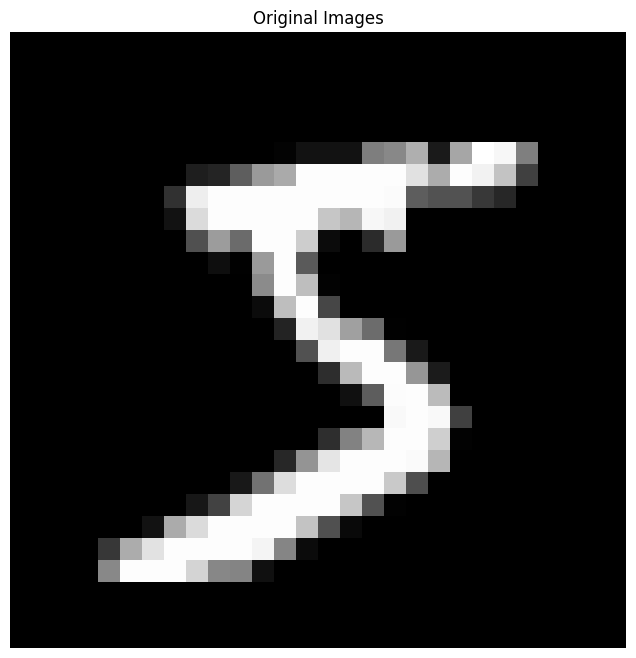

In [43]:
images, _ = next(iter(train_loader))
show_images(images, title="Original Images")

In [44]:
images.view(images.size(0), -1).size()

torch.Size([1, 784])

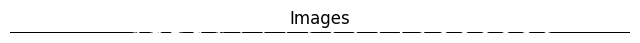

In [45]:
images = images.view(images.size(0), -1)
show_images(images)

In [46]:
embeddings = autoencoder.encoder(images)
reconstructed_images = autoencoder.decoder(embeddings).view(-1, 1, 28, 28)
reconstructed_images = (reconstructed_images - reconstructed_images.min()) / (reconstructed_images.max() - reconstructed_images.min()) # normalize to 0-1 range

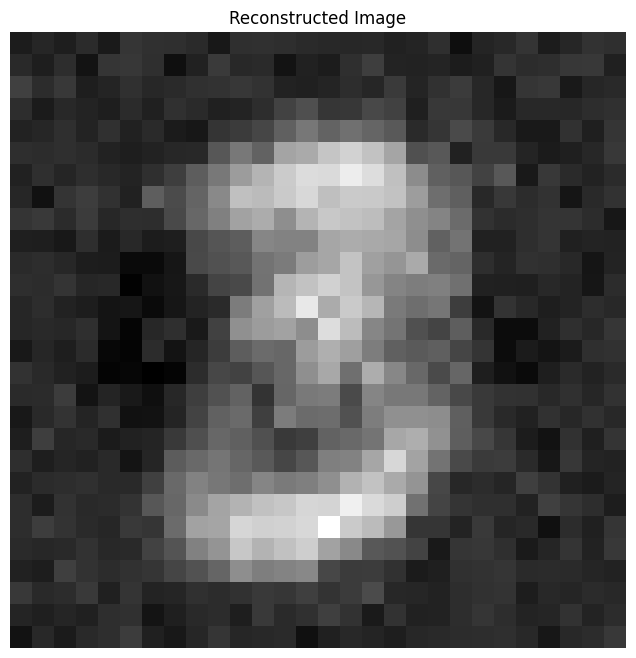

In [47]:
show_images(reconstructed_images, title="Reconstructed Image")

In [48]:
reconstructed_images = autoencoder.decoder(embeddings)

In [49]:
reconstructed_images.size()

torch.Size([1, 784])

In [50]:
reconstructed_images.view(-1, 1, 28, 28).size()

torch.Size([1, 1, 28, 28])